# Proyecto Final

**Algoritmos computacionales**

**Integrantes:**

**Mejía Arratia Yalith Estefania**

**Velasco Gutiérrez Rosa Gabriela**

In [2]:
import Pkg; Pkg.add("LaTeXStrings")

    Updating registry at `C:\Users\gabri\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\gabri\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\gabri\.julia\environments\v1.7\Manifest.toml`


In [4]:
using Plots
using LaTeXStrings

# Modelo de Hodgkin-Huxley

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

Con [Wells]:
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $V$ la diferencia de potencial en la membrana
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:
\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1} & \beta_n(V) &= 0.125 e^{-\frac{V}{80}}
\end{align}
Observemos que cuando $V = 10$ la función está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) &= \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)}
               = \frac{-0.01}{-0.1} = 0.1
\end{align}

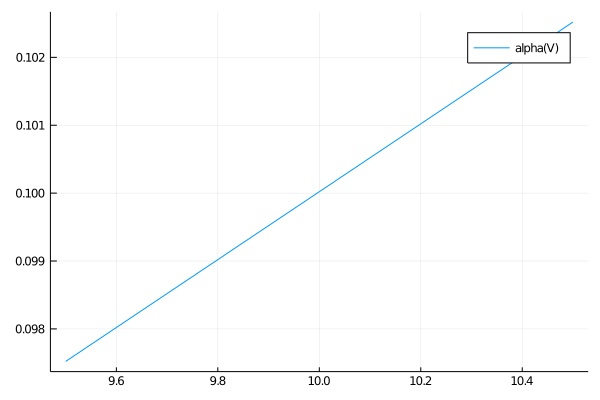

In [5]:
## Programa las función alfa_n como función del voltaje V.
## Necesitarás definir un caso especial cuando V - 10 < epsilon
## Utiliza esta celda para ver como se comporta tu función en esta vecindad
## y elegir un valor de epsilon adecuado
function alpha_n(V) 
    alpha_n(V) = (0.01 * (10.0 - V)) / (exp((10.0 -V)/10.0) - 1.0) #Definimos la función según su formula
    if V-10 == 0 #para cuando la función se indetermine 
        return 0.1 #solicitamos que se use el valor del límite 
    else #si no se indetermina 
        return alpha_n(V) #imprimimos los valores de la formula original
    end 
end 

plot(alpha_n, 9.5:10.5, label="alpha(V)")

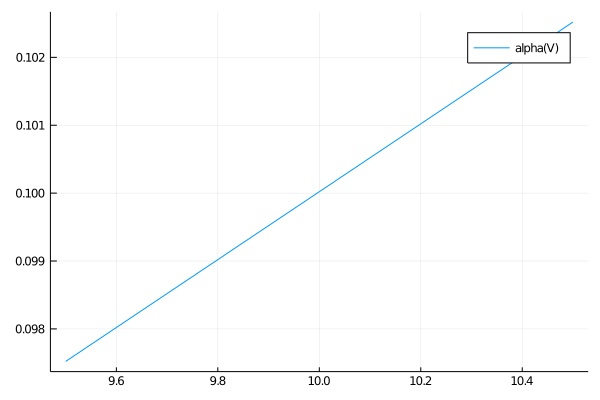

In [6]:
function alpha_n(V) 
    #Para cuando la función se indetermina V= 10 usamos: 
    epsilon= 0.0001 #Definimos el valor de epsilon deseado, este representa la cota mínima de presición que queremos
    if abs(V-10) < epsilon #Si se tiene un valor menor al de la presición 
        alpha_n = 0.1 #solicitamos que alpha_n sea igual al valor de su límite 
    else #si no se indetermina 
        alpha_n= (0.01 * (10.0 - V)) / (exp((10.0 -V)/10.0) - 1.0) #Definimos la función según su formula 
    end 
    return alpha_n
end 

plot(alpha_n, 9.5:10.5, label="alpha(V)")

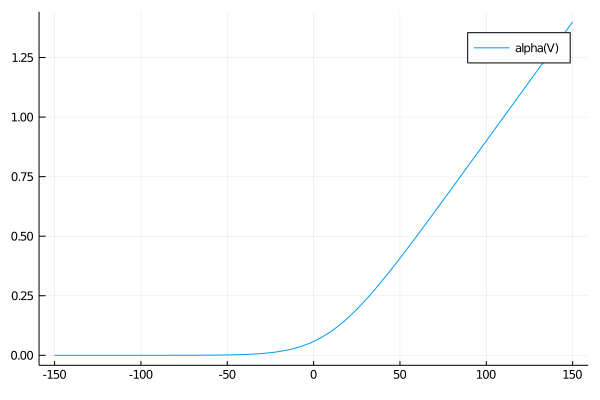

In [30]:
#Hacemos una prueba con un dominio más grande 
plot(alpha_n, -150:150, label="alpha(V)")

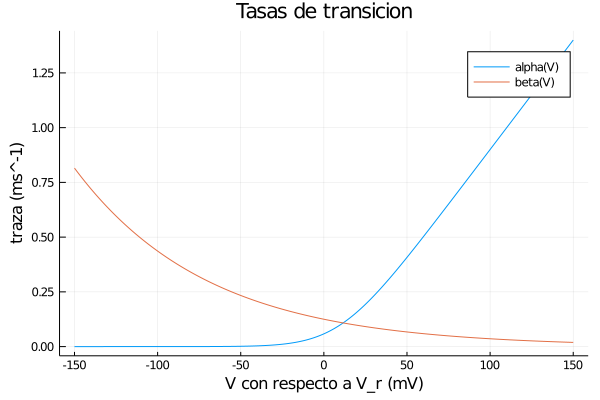

In [33]:
## Programa la funciones como función del voltaje V, para la compuerta de K
## Genera luego una gráfica de alfa_n y beta_n
function beta_n(V) 
    beta_n(V) = 0.125 * exp((-V)/80) #definimos la función según su formula
    return beta_n(V)
end
function plotAlpha() 
    V = -150:150
    plot(
        V,
        alpha_n,
        title= "Tasas de transicion",
        xlabel= "V con respecto a V_r (mV)",
        ylabel= "traza (ms^-1)",
        label= "alpha(V)"
    )
    plot!(V, beta_n, label="beta(V)")
end


plotAlpha()

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1} & \beta_m(V) &= 4 e^{-\frac{V}{18}} \\
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}} & \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}
Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) &= \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)}
               = \frac{-0.1}{-0.1} = 1
\end{align}

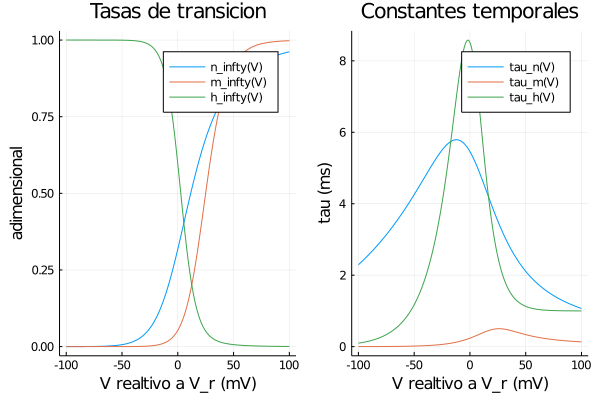

In [53]:
## Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales.

## Agrega las funciones correspondientes para la compuerta de sodio también,
## deduce sus firmas a partir de las llamadas en la función para graficar


function alpha_m(V)
    epsilon=0.0001 #Definimos el valor de epsilon deseado 
    if abs(V-25) < epsilon #Para cuando se indetermine la función
        alpha_m = 1 #Usamos el valor correspondiente a su limite 
    else
        alpha_m = (0.1 * (25.0 - V)) / (exp((25.0 -V)/10.0) - 1.0) #Definimos alpha_m según su formula
    end 
    return alpha_m
end 

function beta_m(V)
    beta_n = 4 * exp((-V)/18) #Definimos beta_m según su formula
    return beta_n
end


function alpha_h(V)
    alpha_h= 0.07 * exp((-V)/20) #Definimos alpha_h usando su formula 
    return alpha_h
end


function beta_h(V)
    beta_h = 1 / (exp((30-V)/10)+1) #Definimos beta_h según su formula
    return beta_h
end


function tau_inf(alpha, beta)
    tau_n= 1/(alpha + beta)
    return tau_n
end


function n_inf(alpha, beta)
    n_inf=alpha/(alpha + beta)
    return n_inf
end


function plotParameters()    
    V = -100:100
    
    n_inf_n(V) = n_inf(alpha_n(V), beta_n(V))
    tau_inf_n(V) = tau_inf(alpha_n(V), beta_n(V))
    
    n_inf_m(V) = n_inf(alpha_m(V), beta_m(V))
    tau_inf_m(V) = tau_inf(alpha_m(V), beta_m(V))
    
    n_inf_h(V) = n_inf(alpha_h(V), beta_h(V))
    tau_inf_h(V) = tau_inf(alpha_h(V), beta_h(V))
    
    p1 = plot(
        V,
        [n_inf_n, n_inf_m, n_inf_h],
        label=["n_infty(V)" "m_infty(V)" "h_infty(V)"]
    )
    
    p2 = plot(
        V,
        [tau_inf_n, tau_inf_m, tau_inf_h],
        label=["tau_n(V)" "tau_m(V)" "tau_h(V)"]
    )
    
    plot(
        p1,
        p2,
        layout=(1, 2),
        title=["Tasas de transicion" "Constantes temporales"],
        xlabel=["V realtivo a V_r (mV)" "V realtivo a V_r (mV)"],
        ylabel=["adimensional" "tau (ms)"],
        legend=true
    )
end


plotParameters()

![tasas_constantes](figuras/tazas-y-constantes.jpg)

## Simulación con el método numérico de Euler

El método de Euler realiza una aproxima a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y a partir de él, se calcula el valor de $y$ para el tiempo $t + \Delta t$ iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} &= g_{Na}m^3h   &   G_{K} &= g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando el método de Euler produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

In [9]:
using DifferentialEquations

In [55]:
#definimos las constantes usando la función const 
const DeltaT = 0.01 #ms
const maxT = 50.0 #ms
const V0= 0.0 #mV
const gNa= 120.0 #mS/cm2
const gK= 36.0 
const gL= 0.3
const Cm= 1.0 #micro F/cm2 Capacitancia de la membrana 
const ENa=115.0 # Utilizando la convensión original de Hodkin-Huxley
const EK=-12.0
const EL=10.613

10.613

In [56]:
#Se usaran las funciones previamente definidas
# Adicionalmente se definieron n_inf para n, m y h 
n_inf_n(V) = n_inf(alpha_n(V), beta_n(V))
n_inf_m(V) = n_inf(alpha_m(V), beta_m(V))
n_inf_h(V) = n_inf(alpha_h(V), beta_h(V))

n_inf_h (generic function with 1 method)

In [57]:
#Definimos la función de corriente 
function Iext(t)
    t0= 10.0
    tfin= 16.0
    current= 6.5
    """ Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microampers."""
    if (t>t0) & (t<tfin)
        return current # micro A/cm2
    else 
        return 0
    end
end 

Iext (generic function with 1 method)

In [58]:
## Implementa aquí el algoritmo de intregración numérica de Euler para calcular V(t)
##
## Asegúrate de que, al ejecutar la simulación con los parámetros por defecto,
## se reproduce la imagen de arriba.
##
function EulerHodkinHuxley(u, p, t)
    V0 = 0
    n,m,h,V = u 
    V_diff = V-V0
    dn = alpha_n(V_diff)*(1-n) - beta_n(V_diff)*n
    dm = alpha_m(V_diff)*(1-m) - beta_m(V_diff)*m
    dh = alpha_h(V_diff)*(1-h) - beta_h(V_diff)*h
    
    #Definimos las corrientes 
    G_K= gK * (n ^ 4.0) #conductancia de potasio 
    G_Na= gNa * (m ^ 3.0) * h #Conductancia de sodio 
    #Definimos dV utilizando la formula dada
    dV = (Iext(t) + (ENa - V)*G_Na + (EK - V)*G_K + (EL - V)*gL)/Cm 
    
    [dn;dm;dh;dV]
end

EulerHodkinHuxley (generic function with 1 method)

In [59]:
#Corremos el modelo 
u0= [n_inf_n(0); n_inf_m(0); n_inf_h(0); 0] #condiciones iniciales 
tspan = (0.0,50.0) #intervalo de tiempo 
prob = ODEProblem(EulerHodkinHuxley, u0, tspan) #utilizamos la función ODEProblem del paquete DifferentialEquations
#ODEProblem(f, u0, tspan) donde f=función que se va a resolver, u0= condiciones iniciales, tspan=intervalo de tiempo en el que se va a gráficar 
sol = solve(prob, saveat=0.01); #resolvemos usando solve()

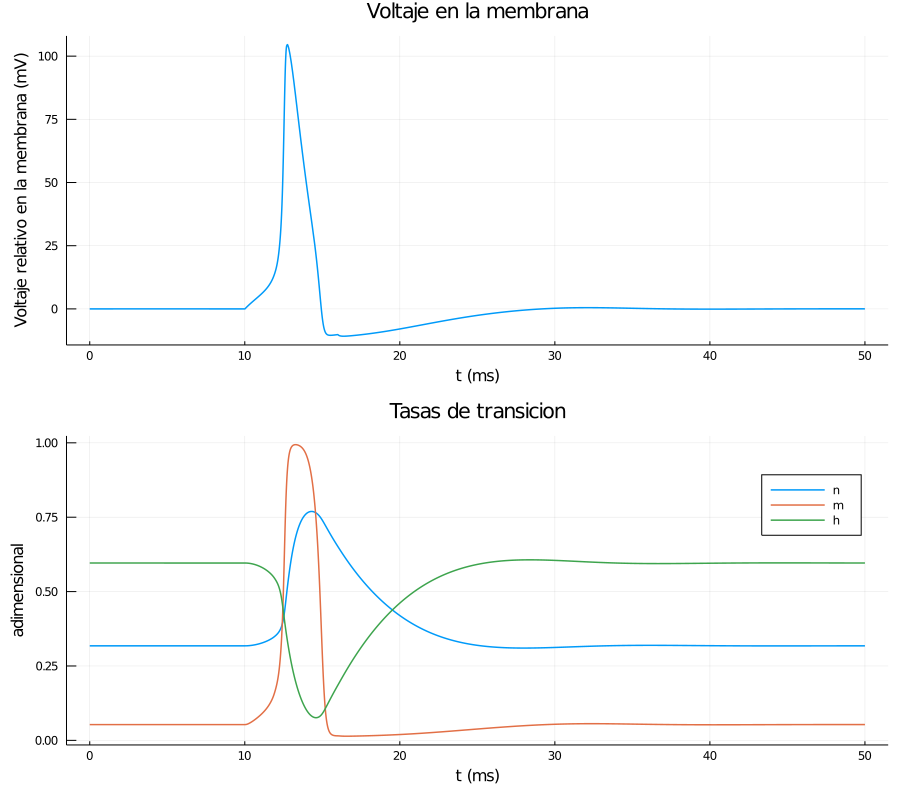

In [60]:
#Gráficas
#p1 corresponde al voltaje en la membrana 
p1 = plot(sol.t, sol[4,:], legend=false, ylabel="Voltaje relativo en la membrana (mV)", xlabel= "t (ms)", title="Voltaje en la membrana")
#p2 corresponde a las tazas de transición 
p2 = plot(sol.t, sol[1:3,:]', label=["n" "m" "h"], legend=:topright, ylabel="adimensional", xlabel= "t (ms)", title="Tasas de transicion")

l = grid(2, 1, heights=[0.5, 0.5]) #Se usa grid para el fondo de lineas en las gráficas 
plot(p1, p2, layout = l, size=(900,800), lw=1.5) #size= tamaño de la figura, lw=ancho de las líneas 

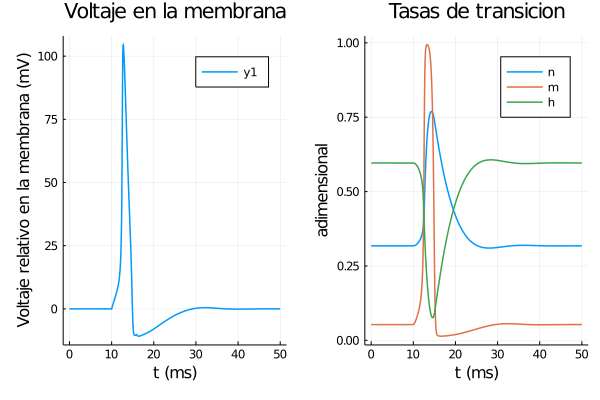

In [61]:
plot(p1,
    p2,
    title=["Voltaje en la membrana" "Tasas de transicion"],
    xlabel="t (ms)",
    ylabel=["Voltaje relativo en la membrana (mV)" "adimensional"],
    legend=true,
)

In [72]:
## Después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes
## ¿Qué observas?
##
## Inserta al final una celda con tus comentarios y resultados
#Current = 10
function Iext_10(t)
    t0= 10.0
    tfin= 16.0
    current= 10
    """ Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microampers."""
    if (t>t0) & (t<tfin)
        return current # micro A/cm2
    else 
        return 0
    end
end 

Iext_10 (generic function with 1 method)

In [91]:
#Repetimos el proceso pero ahora con t en 10->30, primero con corriente = 10 y luego con corriente =-10
## Implementa aquí el algoritmo de intregración numérica de Euler para calcular V(t)
##
## Asegúrate de que, al ejecutar la simulación con los parámetros por defecto,
## se reproduce la imagen de arriba.
##
function EulerHodkinHuxley_10(u, p, t)
    V0 = 0
    n,m,h,V = u 
    V_diff = V-V0
    dn = alpha_n(V_diff)*(1-n) - beta_n(V_diff)*n
    dm = alpha_m(V_diff)*(1-m) - beta_m(V_diff)*m
    dh = alpha_h(V_diff)*(1-h) - beta_h(V_diff)*h
    
    #Definimos las corrientes 
    G_K= gK * (n ^ 4.0) #conductancia de potasio 
    G_Na= gNa * (m ^ 3.0) * h #Conductancia de sodio 
    #Definimos dV utilizando la formula dada
    dV = (Iext_10(t) + (ENa - V)*G_Na + (EK - V)*G_K + (EL - V)*gL)/Cm 
    
    [dn;dm;dh;dV]
end


EulerHodkinHuxley_10 (generic function with 1 method)

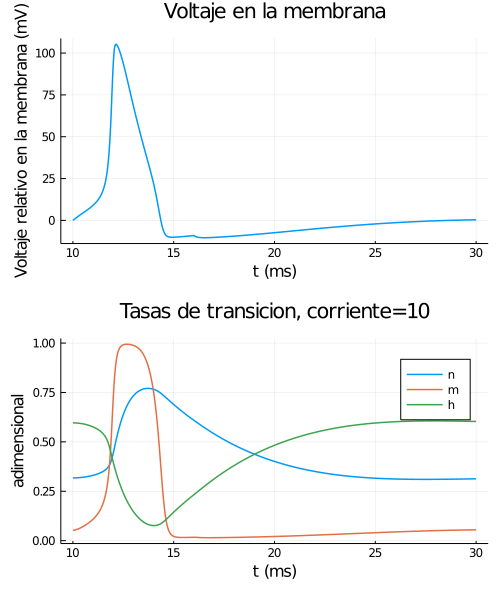

In [95]:
u0= [n_inf_n(0); n_inf_m(0); n_inf_h(0); 0] #condiciones iniciales 
tspan = (10.0,30.0) #intervalo de tiempo 
prob = ODEProblem(EulerHodkinHuxley_10, u0, tspan) #utilizamos la función ODEProblem del paquete DifferentialEquations
#ODEProblem(f, u0, tspan) donde f=función que se va a resolver, u0= condiciones iniciales, tspan=intervalo de tiempo en el que se va a gráficar 
sol = solve(prob, saveat=0.01); #resolvemos usando solve()
#Gráficas
#p1 corresponde al voltaje en la membrana 
p3 = plot(sol.t, sol[4,:], legend=false, ylabel="Voltaje relativo en la membrana (mV)", xlabel= "t (ms)", title="Voltaje en la membrana")
#p2 corresponde a las tazas de transición 
p4 = plot(sol.t, sol[1:3,:]', label=["n" "m" "h"], legend=:topright, ylabel="adimensional", xlabel= "t (ms)", title="Tasas de transicion, corriente=10")

l = grid(2, 1, heights=[0.5, 0.5]) #Se usa grid para el fondo de lineas en las gráficas 
plot(p3, p4, layout = l, size=(500,600), lw=1.5) #size= tamaño de la figura, lw=ancho de las líneas 

In [82]:
#Current = -10
function Iext_n10(t)
    t0= 10.0
    tfin= 16.0
    current= -10
    """ Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microampers."""
    if (t>t0) & (t<tfin)
        return current # micro A/cm2
    else 
        return 0
    end
end 

Iext_n10 (generic function with 1 method)

In [83]:
function EulerHodkinHuxley_n10(u, p, t)
    V0 = 0
    n,m,h,V = u 
    V_diff = V-V0
    dn = alpha_n(V_diff)*(1-n) - beta_n(V_diff)*n
    dm = alpha_m(V_diff)*(1-m) - beta_m(V_diff)*m
    dh = alpha_h(V_diff)*(1-h) - beta_h(V_diff)*h
    
    #Definimos las corrientes 
    G_K= gK * (n ^ 4.0) #conductancia de potasio 
    G_Na= gNa * (m ^ 3.0) * h #Conductancia de sodio 
    #Definimos dV utilizando la formula dada
    dV = (Iext_n10(t) + (ENa - V)*G_Na + (EK - V)*G_K + (EL - V)*gL)/Cm 
    
    [dn;dm;dh;dV]
end


EulerHodkinHuxley_n10 (generic function with 1 method)

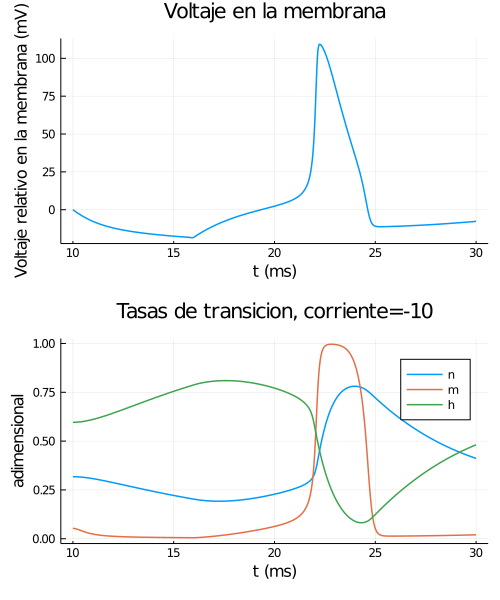

In [94]:
#Corremos el modelo 
u0= [n_inf_n(0); n_inf_m(0); n_inf_h(0); 0] #condiciones iniciales 
tspan = (10.0,30.0) #intervalo de tiempo 
prob = ODEProblem(EulerHodkinHuxley_n10, u0, tspan) #utilizamos la función ODEProblem del paquete DifferentialEquations
#ODEProblem(f, u0, tspan) donde f=función que se va a resolver, u0= condiciones iniciales, tspan=intervalo de tiempo en el que se va a gráficar 
sol = solve(prob, saveat=0.01); #resolvemos usando solve()
#Gráficas
#p1 corresponde al voltaje en la membrana 
p5 = plot(sol.t, sol[4,:], legend=false, ylabel="Voltaje relativo en la membrana (mV)", xlabel= "t (ms)", title="Voltaje en la membrana")
#p2 corresponde a las tazas de transición 
p6 = plot(sol.t, sol[1:3,:]', label=["n" "m" "h"], legend=:topright, ylabel="adimensional", xlabel= "t (ms)", title="Tasas de transicion, corriente=-10")

l = grid(2, 1, heights=[0.5, 0.5]) #Se usa grid para el fondo de lineas en las gráficas 
plot(p5, p6, layout = l, size=(500,600), lw=1.5) #size= tamaño de la figura, lw=ancho de las líneas 

In [66]:
#Formulas de corriente 
GK(V,t)= Iext(V,t)/(V-EK)
GNa(V,t)= Iext(V,t)/(V-ENa)

GNa (generic function with 1 method)

# Comentarios y resultados
Escribe aquí tus resultados

    El modelo Hodgkin y Huxley da una descripción del comportamiento de los potenciales de acción presentes en las neuronas, explica cómo se inician y transmiten durante el paso de un impulso nervioso. El modelo explica  un fenómeno de despolarización y repolarización de la membrana de un axón o fibra muscular, obedeciendo la ley del "todo o nada".
    Recordemos que un potencial de acción es un cambio en el potencial         eléctrico que pasa a través de una membrana plasmática cuando llega al  sistema un impulso nervioso. 
    Haciendo uso de un axón gigante de calamar estos investugadores pudieron estudiar el comportamiento de las neuronas. 

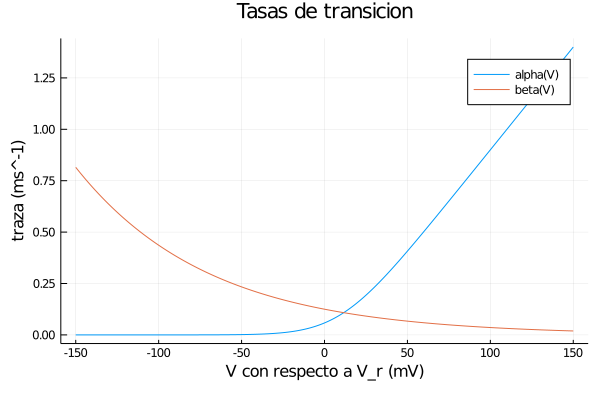

In [67]:
plotAlpha()

    Inicialmente se obtuvieron las tazas de transición entre alpha y beta n, donde n representa la activación del canal de  potasio. 
    Las células tienen en su interior una gran concentración de potasio y una muy baja de sodio; pasa lo contrario en el exterior de la célula. Cuando se activan los canales de potasio dependientes de voltaje estos pueden permanecer activos o transicionar a un estado inactivo; entonces existen dos estados que pueden tomar donde la posibilidad de transicionar entre ellos depende del voltaje.
    En esta primer gráfica vemos como alpha_n(V) representa la taza de transición entre el estado inactivo a activo de los canales, presentando un cambio ante cierta cantidad de voltaje.
    Por otro lado beta_n(V) representa la tasa de transición entre el estado activo a inactivo de los canales, por lo que se puede ver como con forme cambia el voltaje la traza disminuye. 

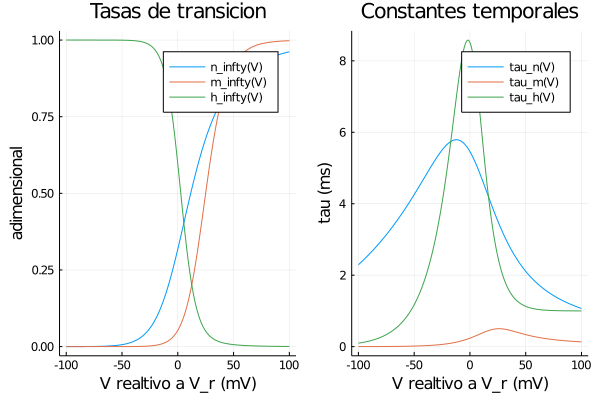

In [68]:
plotParameters()

    Los canales de sodio cuentan con dos tipos de compuertas que permiten y regulan el paso de estos iones dentro del axón, m representa la compuerta de activación y h la de desactivación. 
    En la primer gráfica "tasas de transición" se puede ver que durante el estado de reposo m permanece cerrada mientras que h se encuentra abierta, cuando se presenta un potencial de acción m se abre (comienza a crecer en la gráfica) y permite la entrada de iones K; esta apertura hace que h se cierre provocando la inactivación de los canales y el inicio de un período refractario en el que no importa el estímulo que llegue estos no se activaran. Esto sigue por un tiempo hasta que h se vuelve a activar, al mismo tiempo m permanecerá cerrado hasta que se registre un nuevo potencial de acción.
    Paralelo a este suceso mientras que m se encuentra cerrado, la compuerta n de potasio también se encuentra inactiva por lo que no existe un flujo de estos iones en la celula, al momento en que inicia la despolarización y h se cierra, n se activa permitiendo la salida de K, esto sigue hasta que h vuelve a abrirse desactivando la comporta n.
    
    Respecto a la gráfica "constantes temporales", primero recordemos que tau es una constante que indica qué tan rápido las compuertas (m,n,h) responden; entonces se tiene que entre mayor sea tau la apertura de las compuertas será más lenta,   mientras que entre menor sea las compuertas se activan o desactivan más rápido. Con esto entonces vemos como el comportamiento de la compuerta h es mucho más lento que el de las compuertas n y m, sucede lo comtrario con m ya que esta       compuerta de sodio trabaja más rápido que las otras dos. 

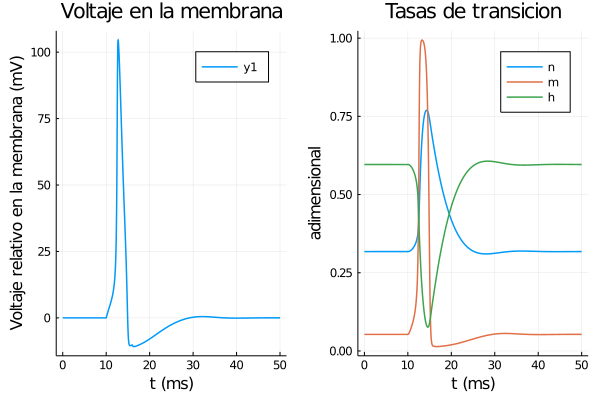

In [69]:
plot(p1,
    p2,
    title=["Voltaje en la membrana" "Tasas de transicion"],
    xlabel="t (ms)",
    ylabel=["Voltaje relativo en la membrana (mV)" "adimensional"],
    legend=true,
)

    En la gráfica "Tasas de transición" se presenta el comportamiento de los canales ante un pulso de voltaje. Inicialmente se observa que (durante el potencial de reposo 0) los canales m de sodio se encuentran en el estado inactivo mientras que la activación de los canales n de potasio es de tamaño moderado. 
    Cuando llega un estímulo (voltaje) inicia el proceso de despolarización donde la diferencia eléctrica entre los lados de la membrana disminuye, esto se debe al ingreso de sodio Na+ al axón debido a la apertura de sus canales y se observa en la gráfica cuando m empieza a aumentar hasta llegar al potencial de acción; después de unos mili segundos h disminuye debido a una subita inactivación de Na, mientas que la los canales de potasio K se activan aumentando n. 
    Cuando Na+ llega al potencial de acción inicicia el proceso de repolarización (la célula vuelve a tener carga negativa) donde se cierran los canales de sodio impidiendo el paso de estos iones a la célula; al mismo tiempo los canales de      potasio permanecen abiertos pero al tener una alta concentración dentro de la célula estos salen al espacio extracelular, esto se observa en la gráfica cuando m y n empiezan a disminuir a su valor original. 
    Finalmente ya que la carga eléctrica de la célula sigue haciendome más negativa cada vez m llega a un estado de hiperpolarización antes de regresar a su estado de reposo, en esta fase h empieza a crecer y por fin se cierran los canales de  potasio.   

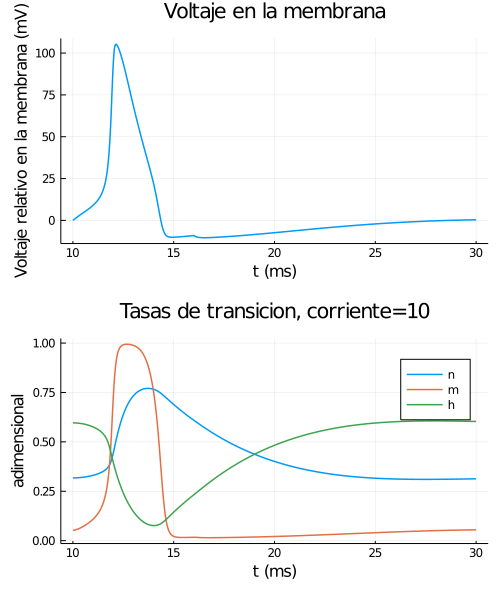

In [102]:
u0= [n_inf_n(0); n_inf_m(0); n_inf_h(0); 0] #condiciones iniciales 
tspan = (10.0,30.0) #intervalo de tiempo 
prob = ODEProblem(EulerHodkinHuxley_10, u0, tspan) #utilizamos la función ODEProblem del paquete DifferentialEquations
#ODEProblem(f, u0, tspan) donde f=función que se va a resolver, u0= condiciones iniciales, tspan=intervalo de tiempo en el que se va a gráficar 
sol = solve(prob, saveat=0.01); #resolvemos usando solve()
#Gráficas
#p1 corresponde al voltaje en la membrana 
p3 = plot(sol.t, sol[4,:], legend=false, ylabel="Voltaje relativo en la membrana (mV)", xlabel= "t (ms)", title="Voltaje en la membrana")
#p2 corresponde a las tazas de transición 
p4 = plot(sol.t, sol[1:3,:]', label=["n" "m" "h"], legend=:topright, ylabel="adimensional", xlabel= "t (ms)", title="Tasas de transicion, corriente=10")

l = grid(2, 1, heights=[0.5, 0.5]) #Se usa grid para el fondo de lineas en las gráficas 
plot(p3, p4, layout = l, size=(500,600), lw=1.5) #size= tamaño de la figura, lw=ancho de las líneas 


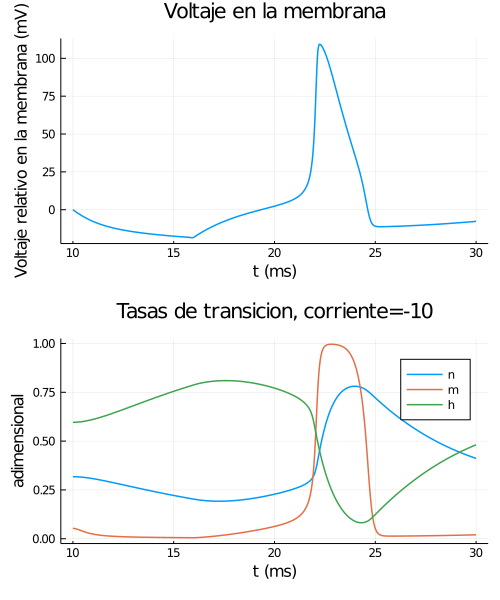

In [103]:
#Corremos el modelo 
u0= [n_inf_n(0); n_inf_m(0); n_inf_h(0); 0] #condiciones iniciales 
tspan = (10.0,30.0) #intervalo de tiempo 
prob = ODEProblem(EulerHodkinHuxley_n10, u0, tspan) #utilizamos la función ODEProblem del paquete DifferentialEquations
#ODEProblem(f, u0, tspan) donde f=función que se va a resolver, u0= condiciones iniciales, tspan=intervalo de tiempo en el que se va a gráficar 
sol = solve(prob, saveat=0.01); #resolvemos usando solve()
#Gráficas
#p1 corresponde al voltaje en la membrana 
p5 = plot(sol.t, sol[4,:], legend=false, ylabel="Voltaje relativo en la membrana (mV)", xlabel= "t (ms)", title="Voltaje en la membrana")
#p2 corresponde a las tazas de transición 
p6 = plot(sol.t, sol[1:3,:]', label=["n" "m" "h"], legend=:topright, ylabel="adimensional", xlabel= "t (ms)", title="Tasas de transicion, corriente=-10")

l = grid(2, 1, heights=[0.5, 0.5]) #Se usa grid para el fondo de lineas en las gráficas 
plot(p5, p6, layout = l, size=(500,600), lw=1.5) #size= tamaño de la figura, lw=ancho de las líneas 

    Al cambiar de parametros (corriente y tiempo) se observa el mismo comportamiento pero ahora cuando se tiene una corriente negativa (-10) se observa como el potencial de acción se observa después en el tiempo (entre los 20 y 25ms); mientras que cuando la corriente es positiva (10) se alcanza dicho potencial de acción entre los 10 y 15ms al igual que en lo explicado previamente. 